In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [19]:
cell_df = pd.read_csv("Train.csv")
cell_df.head()

,SOC-1,SOC-2,SOC-3,SOC-4,SOC-5,SOC-6,SOC-7,SOR-1,SOR-2,SOR-3,SOR-4,SOR-5,SOR-6,SOR-7,SOR-8,SOR-9,Label
0,9,36,45,36,36,36,9,18,9,9,18,18,45,18,18,54,A
1,0,36,27,36,27,36,0,9,9,9,18,18,18,45,18,18,A
2,27,27,27,27,27,27,27,9,9,18,18,18,45,18,18,36,A
3,18,81,27,27,27,27,54,54,18,18,18,45,18,18,18,54,B
4,81,27,27,27,27,27,54,54,18,18,18,54,18,18,18,54,B


In [20]:
cell_df.dtypes

SOC-1     int64
SOC-2     int64
SOC-3     int64
SOC-4     int64
SOC-5     int64
SOC-6     int64
SOC-7     int64
SOR-1     int64
SOR-2     int64
SOR-3     int64
SOR-4     int64
SOR-5     int64
SOR-6     int64
SOR-7     int64
SOR-8     int64
SOR-9     int64
Label    object
dtype: object

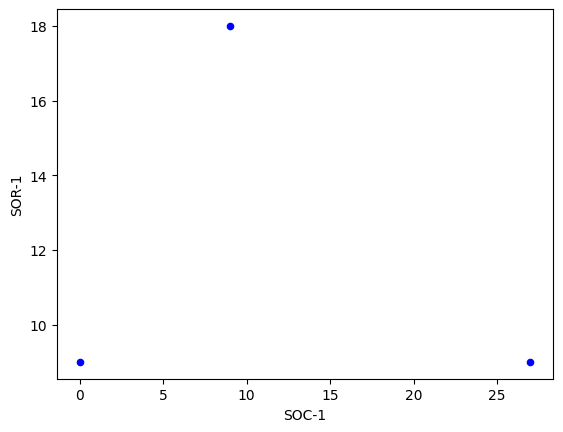

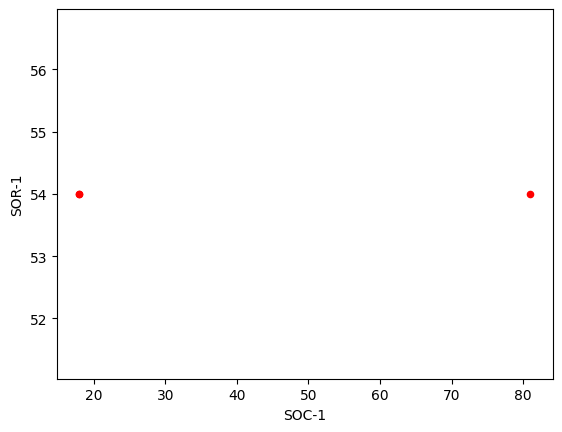

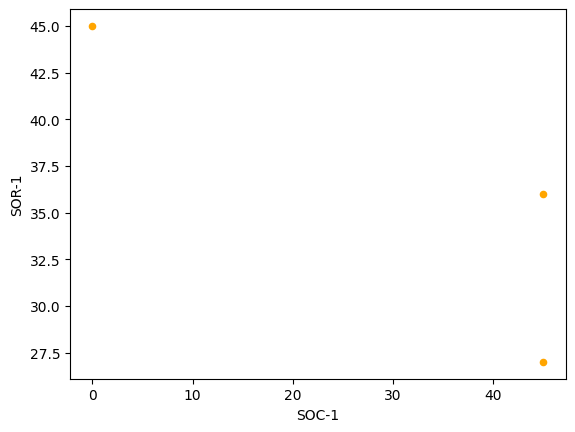

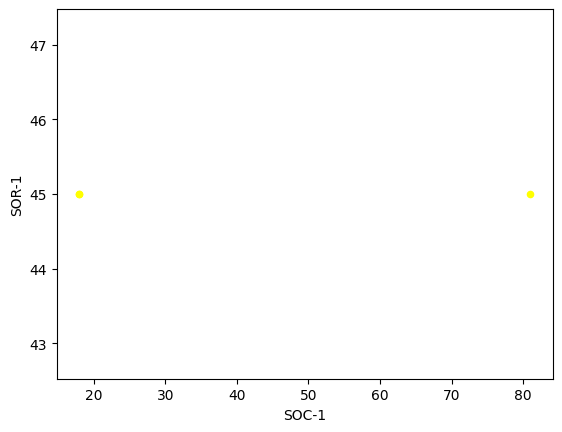

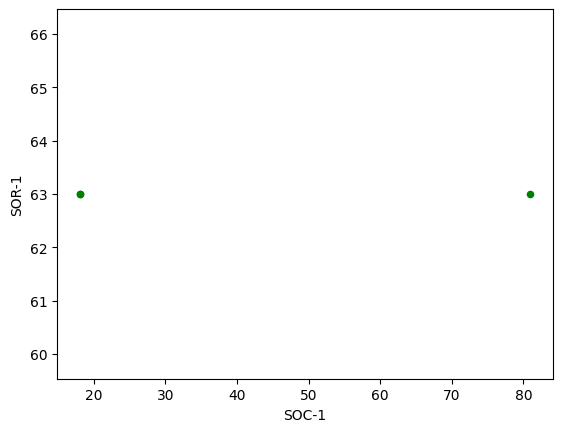

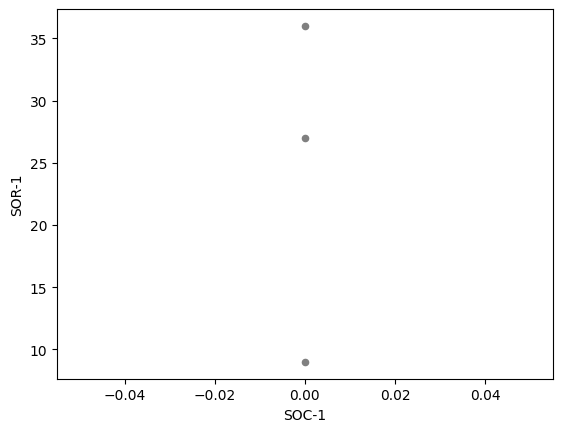

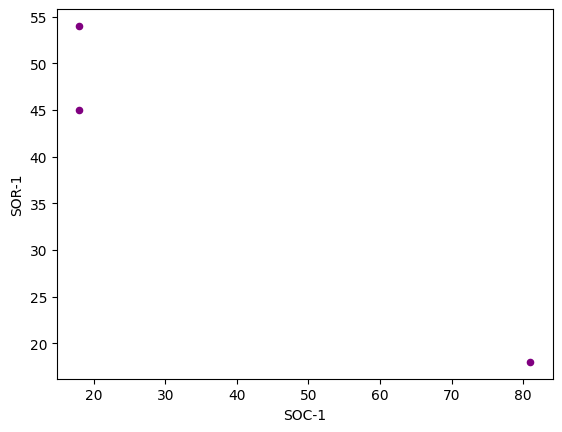

In [35]:
listOfItem = ["A", "B", "C", "D","E","J", "K"]
listOfColor = ["Blue", "Red", "Orange", "Yellow", "Green", "Gray","Purple"]
for key, itme in enumerate(listOfItem):
    color = listOfColor[key]
    cell_df[cell_df["Label"] == itme].plot(kind="scatter", x="SOC-1", y="SOR-1", color=color)
plt.show()

In [37]:
columns=  [f"SOC-{x}" for x in range(1,8)] + [ f"SOR-{x}" for x in range(1,10)]
feature_df = cell_df[columns]
X_train = np.asarray(feature_df)
X_train[0:5]

array([[ 9, 36, 45, 36, 36, 36,  9, 18,  9,  9, 18, 18, 45, 18, 18, 54],
       [ 0, 36, 27, 36, 27, 36,  0,  9,  9,  9, 18, 18, 18, 45, 18, 18],
       [27, 27, 27, 27, 27, 27, 27,  9,  9, 18, 18, 18, 45, 18, 18, 36],
       [18, 81, 27, 27, 27, 27, 54, 54, 18, 18, 18, 45, 18, 18, 18, 54],
       [81, 27, 27, 27, 27, 27, 54, 54, 18, 18, 18, 54, 18, 18, 18, 54]])

In [38]:
cell_df['Label'] = cell_df['Label']
y_train = np.asarray(cell_df['Label'])
y_train [0:5]

array(['A', 'A', 'A', 'B', 'B'], dtype=object)

In [39]:
cell_df_test = pd.read_csv("Test.csv")
cell_df_test.head()

,SOC-1,SOC-2,SOC-3,SOC-4,SOC-5,SOC-6,SOC-7,SOR-1,SOR-2,SOR-3,SOR-4,SOR-5,SOR-6,SOR-7,SOR-8,SOR-9,Label
0,9,31,51,42,36,37,9,18,15,9,24,18,45,24,18,44,A
1,12,26,27,31,23,26,6,9,4,9,18,13,18,40,14,26,A
2,27,22,33,28,27,22,27,9,9,18,18,18,30,18,18,48,A
3,18,76,39,33,27,27,54,54,13,18,24,45,24,24,18,54,B
4,71,27,27,28,27,27,49,54,18,13,18,44,18,18,19,54,B


In [40]:
feature_df_test = cell_df_test[columns]
X_test = np.asarray(feature_df_test)
X_test[0:5]

array([[ 9, 31, 51, 42, 36, 37,  9, 18, 15,  9, 24, 18, 45, 24, 18, 44],
       [12, 26, 27, 31, 23, 26,  6,  9,  4,  9, 18, 13, 18, 40, 14, 26],
       [27, 22, 33, 28, 27, 22, 27,  9,  9, 18, 18, 18, 30, 18, 18, 48],
       [18, 76, 39, 33, 27, 27, 54, 54, 13, 18, 24, 45, 24, 24, 18, 54],
       [71, 27, 27, 28, 27, 27, 49, 54, 18, 13, 18, 44, 18, 18, 19, 54]])

In [41]:
cell_df['Label'] = cell_df_test['Label']
y_test = np.asarray(cell_df_test['Label'])
y_test [0:5]

array(['A', 'A', 'A', 'B', 'B'], dtype=object)

In [42]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC()

In [43]:
yhat = clf.predict(X_test)
yhat

array(['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'D', 'D', 'D', 'E',
       'E', 'E', 'J', 'J', 'J', 'K', 'K', 'K'], dtype=object)

In [44]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

1.0

In [47]:
from sklearn.metrics import classification_report, confusion_matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=listOfItem)
np.set_printoptions(precision=7)
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00         3
           B       1.00      1.00      1.00         3
           C       1.00      1.00      1.00         3
           D       1.00      1.00      1.00         3
           E       1.00      1.00      1.00         3
           J       1.00      1.00      1.00         3
           K       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

